In [1]:
import hamiltonianstryout as tr
import create_distribution as cr
import one_matrix_model as om
import importlib
import numpy as np
importlib.reload(cr)
from qiskit.quantum_info import Statevector
import Ansatz as an 

In [38]:
# create hamiltonian for V =  x^2 + g x^3 
D = 3
N = 1 
a = 1
g = 0.001
power = 2
power_interaction = 3
squareterm = tr.matrix_terms(qubits_per_dim = D, dimension= N, lattice_spacing = a, pow = power)
interaction = tr.matrix_terms(qubits_per_dim = D, dimension= N, lattice_spacing = a, pow = power_interaction) 
hamiltonian = squareterm - g * interaction

In [39]:
varqite = cr.create_distribution_2_varqite(qubits =  D * (N+1), depth = 1 , hamilton = hamiltonian, beta = 1)

54


In [40]:
scipy =  cr.create_distribution_scipy(qubits =  D * (N+1), depth = 1 , hamilton = hamiltonian, beta = 1)

-0.018022388738726858


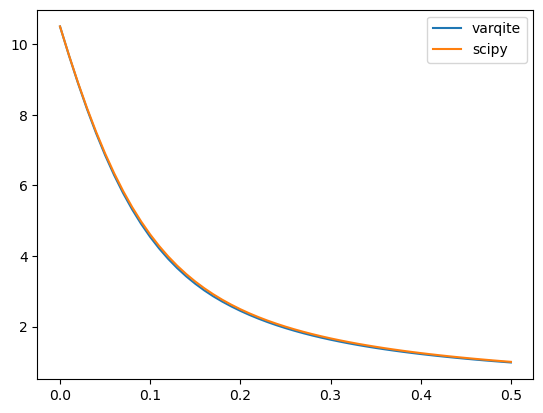

In [41]:
cr.quick_compare(varqite, scipy)

In [42]:
state= Statevector(varqite.evolved_state) 
value =state.expectation_value(om.vandermonde_2(1,3).power(2), list(range(0,6)))
print(value)


(0.9840108779766964+0j)


In [43]:
#python_result
python_res = np.trace(np.exp(-np.real(hamiltonian.to_matrix()))* om.vandermonde_2(1,3).power(2).to_matrix()) / np.trace(np.exp(-np.real(hamiltonian.to_matrix())))
print(python_res)

(1.0020465256733124+0j)


In [45]:
varqite_2 = cr.create_distribution_2_varqite(qubits =  D * (N+1), depth = 1 , hamilton = squareterm, beta = 1)

54


In [49]:
state_2 = Statevector(varqite_2.evolved_state) 
zero_order = state_2.expectation_value(om.vandermonde_2(1,3).power(2), list(range(0,6)))
first_order = state_2.expectation_value(g*interaction @ om.vandermonde_2(1,3).power(2), list(range(0,6)))
second_order =  state_2.expectation_value(g**2/2*interaction.power(2) @ om.vandermonde_2(1,3).power(2), list(range(0,6)))
print(zero_order + first_order)


print("first order correction=" ,first_order)
print("second order correction=" ,second_order)


(0.9840225342885027+0j)
first order correction= (2.3621158442856425e-06+0j)
second order correction= (5.769182884644013e-06+0j)


In [4]:
def parameter_finder(varqite):
    parameters = []
    params = varqite.parameter_values[-1]
    counters = []
    counter = 0
    for parameter in params:
        if parameter > 10**(-4):
            parameters.append(parameter)
            counters.append(counter)
        counter += 1
    return parameters, counters

In [ ]:
for index 